# Links
- [Restoration Filters](https://www.geeksforgeeks.org/types-of-restoration-filters/)
- [Wiener Filters](https://www.youtube.com/watch?v=p_CYqgroEoI)
- [Unsupervised Wiener](https://stackoverflow.com/questions/35192550/wiener-filter-for-image-deblur)
- [Skimage Restoration](https://scikit-image.org/docs/stable/api/skimage.restoration.html)
- [Autoencoders](https://github.com/Gowthamkar6/Reconstruction-of-images-using-convolutional-autoencoder/blob/master/Autoencoders_task.ipynb)
- [Purdue MAP Restoration](https://engineering.purdue.edu/~bouman/grad-labs/MAP-Image-Restoration/pdf/lab.pdf)
- [MLE vs MAP](https://towardsdatascience.com/mle-map-and-bayesian-inference-3407b2d6d4d9)
- [MAP Restoration](https://arc.net/folder/60686B7A-5FE0-47E5-BCDC-CC1462E06D40)
- [Better Denoising Algos](https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html)

```latex
g = Af + n
```

# Loading Libraries and Images

In [1]:
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from google.colab.patches import cv2_imshow

import math

############
# Wiener and MAP Filters
from skimage import color, data, restoration
from scipy.signal import wiener, convolve2d, fftconvolve
from scipy.fft import fft2
from scipy.optimize import minimize
from scipy.stats import norm, gamma

import imageio

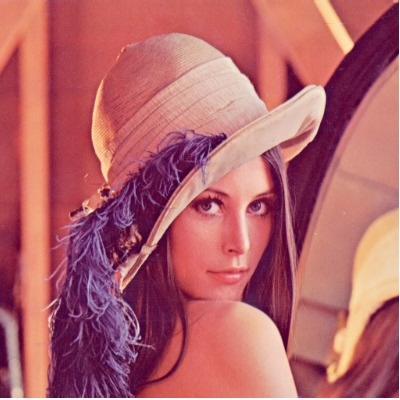

In [2]:
img = Image.open('OIP.jpg')
img

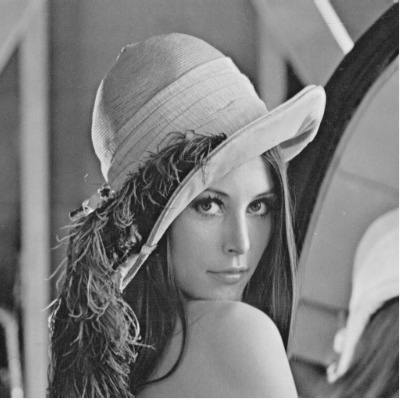

In [3]:
img = Image.open('OIP.jpg').convert('L')
img

array([[163, 163, 162, ..., 166, 131, 239],
       [162, 162, 161, ..., 161, 125, 243],
       [161, 161, 161, ..., 103,  77, 239],
       ...,
       [ 45,  46,  48, ...,  95, 109, 241],
       [249, 250, 249, ..., 246, 246, 254],
       [252, 253, 251, ..., 249, 253, 249]], dtype=uint8)
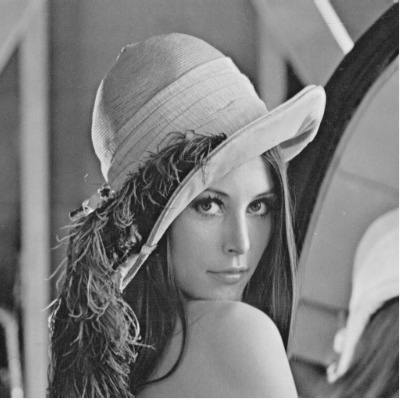

In [4]:
img_data = np.asarray(img)
img_data

# CASE 1 (Denoising Problem)

A is Identity and n is Gaussian Noise

## Adding Noise

In [5]:
mean = 1000
var = 2000
sigma = var ** 0.5

noise = np.random.normal(mean, sigma, img_data.shape)

In [6]:
noise

array([[1121.59927136, 1016.24415299, 1083.79419121, ..., 1055.7522462 ,
        1049.51458336, 1030.65196765],
       [1010.10904266,  983.93690745, 1020.18787483, ..., 1060.30997637,
        1032.57102666,  988.35526972],
       [1058.47056298,  997.70025496, 1007.18667352, ..., 1060.31435696,
         950.60602958,  974.96543712],
       ...,
       [ 985.7494466 , 1025.91759176, 1015.09422403, ..., 1104.70173442,
         917.68276972,  914.16307282],
       [ 972.98340213, 1097.47243193,  939.44867641, ...,  968.45377022,
         959.07948224,  971.83795157],
       [ 962.85234689, 1031.80428603,  984.46493236, ..., 1030.24153079,
         980.94486112, 1022.64055512]])

In [7]:
noisy_image = img_data + noise

# noisy_image[:, :, 0] = img_array[:, :, 0] + gaussian
# noisy_image[:, :, 1] = img_array[:, :, 1] + gaussian
# noisy_image[:, :, 2] = img_array[:, :, 2] + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

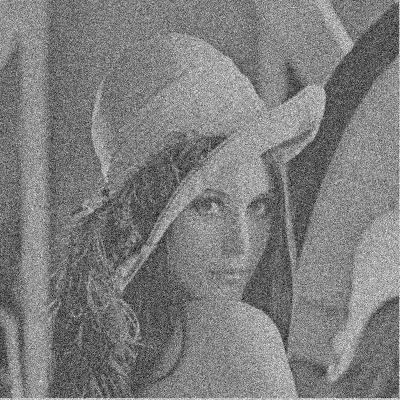

-1

In [8]:
cv2_imshow(noisy_image)
cv2.waitKey(0)

## Wiener Filter (Blind Restoration)

In [9]:
# Assume that we don't have the original noise free image (f)
mean_squared_noise = np.var(noise)
mean_squared_noise

1997.5089166226703

In [10]:
print(type(noisy_image))

<class 'numpy.ndarray'>


In [11]:
mean_squared_noise = int(mean_squared_noise)

In [12]:
filtered_image = wiener(noisy_image, (5, 5), noise = mean_squared_noise)
filtered_image

array([[ 57.56,  74.  ,  90.2 , ...,  93.88,  74.56,  56.32],
       [ 75.92,  98.44, 121.8 , ..., 121.08,  96.72,  75.  ],
       [ 92.64, 120.32, 151.12, ..., 143.04, 115.36,  89.64],
       ...,
       [ 76.56, 105.16, 132.4 , ..., 152.04, 121.84,  91.36],
       [ 66.56,  91.32, 114.96, ..., 127.6 , 101.4 ,  75.6 ],
       [ 55.72,  75.84,  95.48, ..., 102.  ,  80.24,  58.68]])

In [13]:
filtered_image.shape

(400, 400)

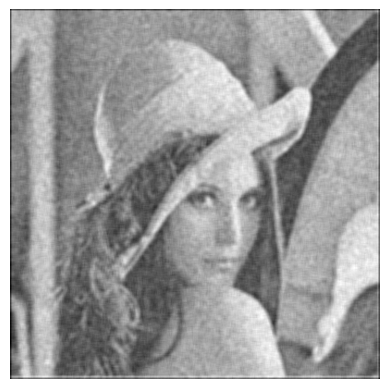

In [14]:
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

## MAP Estimation

Assuming A is I

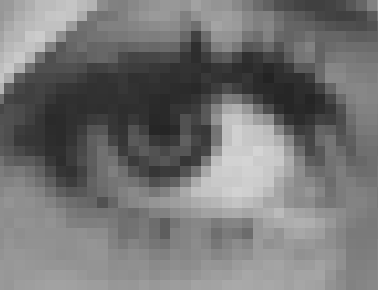

In [15]:
img = Image.open('OIP.png').convert('L')
img

array([[152, 152, 152, ..., 129, 129, 151],
       [152, 152, 152, ..., 129, 129, 151],
       [152, 152, 152, ..., 129, 129, 151],
       ...,
       [153, 153, 153, ..., 136, 136, 138],
       [153, 153, 153, ..., 136, 136, 138],
       [153, 153, 153, ..., 136, 136, 138]], dtype=uint8)
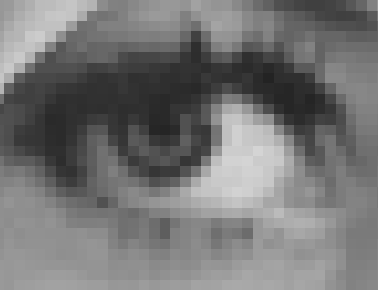

In [16]:
img_data = np.asarray(img)
img_data

In [17]:
img_data = cv2.resize(img_data, (100, 100), interpolation = cv2.INTER_AREA)

In [18]:
mean = 1000
var = 2000
sigma = var ** 0.5

noise = np.random.normal(mean, sigma, img_data.shape)

In [19]:
noisy_image = img_data + noise

# noisy_image[:, :, 0] = img_array[:, :, 0] + gaussian
# noisy_image[:, :, 1] = img_array[:, :, 1] + gaussian
# noisy_image[:, :, 2] = img_array[:, :, 2] + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

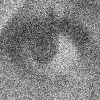

-1

In [20]:
cv2_imshow(noisy_image)
cv2.waitKey(0)

In [21]:
# Too many pixels, taking too long to run

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return width*height

print(get_num_pixels("/content/OIP.png"))

109620


In [22]:
# Prior Distribution
def prior(f):
  return norm.pdf(f, loc=0, scale=100) # Large variance for weak prior

# Likelihood function (Gaussian with noise sigma)
def likelihood(f, noisy):
  return norm.pdf(noisy.reshape(f.shape), loc=f, scale=sigma)

def MAP_objective(f):
  # NEgative Log likelihood for each pixel
  nll = -norm.pdf(noisy_image.reshape(f.shape), loc=f, scale=sigma).sum()

  # Negative log-prior for each pixel (Prior is constant)
  nlp = -norm.pdf(f, loc=0, scale=100).sum()

  # Total Objective
  return nll + nlp

def MAP_denoising(noisy_image, sigma):
  # MAP estimate to minimize the function
  f_hat = minimize(MAP_objective, noisy_image.flatten(), options={'maxiter': 100}).x.reshape(noisy_image.shape)

  return f_hat

# def MAP_denoising(noisy_image, sigma):
#   result = minimize(
#       MAP_objective,
#       noisy_image.flatten(),
#       method='Nelder-Mead',
#       options={'maxiter': 100}
#   )

#   f_hat = result.x.reshape(noisy_image.shape)

#   return f_hat

In [23]:
import time
start_time = time.time()

In [24]:
denoised_image = MAP_denoising(noisy_image, sigma)

In [25]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 275.6395034790039 seconds ---


In [26]:
# Normalize for visualization
cv2.normalize(denoised_image, denoised_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
denoised_image = denoised_image.astype(np.uint8)

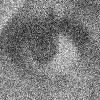

-1

In [27]:
cv2_imshow(denoised_image)
cv2.waitKey(0)

## Deep Network Approach

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [29]:
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)

array([[163, 163, 162, ..., 166, 131, 243],
       [162, 162, 161, ..., 161, 125, 249],
       [161, 161, 161, ..., 103,  77, 242],
       ...,
       [ 45,  46,  48, ...,  95, 109, 244],
       [251, 253, 251, ..., 249, 246, 254],
       [253, 254, 251, ..., 250, 255, 249]], dtype=uint8)
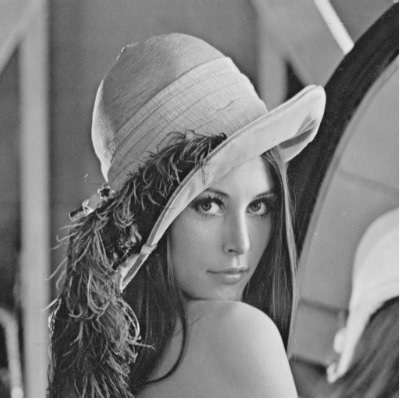

In [30]:
img_data = np.asarray(img)
img_data

In [31]:
mean = 1000
var = 2000
sigma = var ** 0.5

noise = np.random.normal(mean, sigma, img_data.shape)

In [32]:
noisy_image = img_data + noise

# noisy_image[:, :, 0] = img_array[:, :, 0] + gaussian
# noisy_image[:, :, 1] = img_array[:, :, 1] + gaussian
# noisy_image[:, :, 2] = img_array[:, :, 2] + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

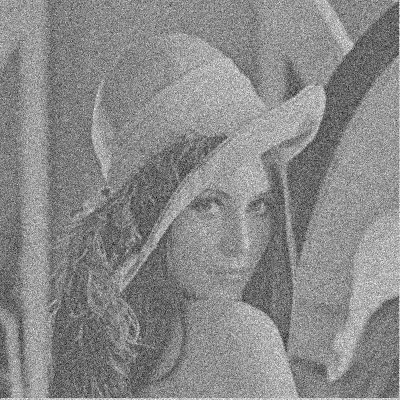

-1

In [33]:
cv2_imshow(noisy_image)
cv2.waitKey(0)

In [34]:
# Normalize the data to a range of 0 to 1
img_norm = img.astype(np.float32) / 255.0
noisy_image_norm = noisy_image.astype(np.float32) / 255.0

In [35]:
img_norm

array([[0.6392157 , 0.6392157 , 0.63529414, ..., 0.6509804 , 0.5137255 ,
        0.9529412 ],
       [0.63529414, 0.63529414, 0.6313726 , ..., 0.6313726 , 0.49019608,
        0.9764706 ],
       [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.40392157, 0.3019608 ,
        0.9490196 ],
       ...,
       [0.1764706 , 0.18039216, 0.1882353 , ..., 0.37254903, 0.42745098,
        0.95686275],
       [0.9843137 , 0.99215686, 0.9843137 , ..., 0.9764706 , 0.9647059 ,
        0.99607843],
       [0.99215686, 0.99607843, 0.9843137 , ..., 0.98039216, 1.        ,
        0.9764706 ]], dtype=float32)

In [36]:
noisy_image_norm

array([[0.6156863 , 0.59607846, 0.68235296, ..., 0.6862745 , 0.5019608 ,
        0.7411765 ],
       [0.5058824 , 0.7019608 , 0.50980395, ..., 0.6117647 , 0.5372549 ,
        0.8784314 ],
       [0.8       , 0.61960787, 0.5294118 , ..., 0.3764706 , 0.29803923,
        0.6117647 ],
       ...,
       [0.29411766, 0.44705883, 0.2784314 , ..., 0.5176471 , 0.60784316,
        0.7254902 ],
       [0.46666667, 0.8       , 0.7294118 , ..., 0.7764706 , 0.75686276,
        0.7490196 ],
       [0.74509805, 0.75686276, 0.7607843 , ..., 0.6862745 , 0.6666667 ,
        0.77254903]], dtype=float32)

In [37]:
img_norm.shape

(400, 400)

In [38]:
noisy_image_norm.shape

(400, 400)

In [39]:
img_norm = np.expand_dims(img_norm, axis = -1)

In [40]:
noisy_image_norm = np.expand_dims(noisy_image_norm, axis = -1)

In [41]:
img_norm.shape

(400, 400, 1)

In [42]:
# Denoising Autoencoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=img_norm.shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

# Bottleneck layer (latent space representation)
model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))

# Decoder part
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


In [43]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

In [44]:
model.fit(noisy_image_norm, img_norm, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 3s 84ms/step - loss: 0.0390
Epoch 2/10
13/13 [==============================] - 1s 86ms/step - loss: 0.0377
Epoch 3/10
13/13 [==============================] - 1s 82ms/step - loss: 0.0320
Epoch 4/10
13/13 [==============================] - 1s 80ms/step - loss: 0.0192
Epoch 5/10
13/13 [==============================] - 1s 82ms/step - loss: 0.0108
Epoch 6/10
13/13 [==============================] - 1s 82ms/step - loss: 0.0085
Epoch 7/10
13/13 [==============================] - 1s 81ms/step - loss: 0.0079
Epoch 8/10
13/13 [==============================] - 1s 82ms/step - loss: 0.0075
Epoch 9/10
13/13 [==============================] - 1s 88ms/step - loss: 0.0074
Epoch 10/10
13/13 [==============================] - 2s 135ms/step - loss: 0.0071


In [45]:
denoised_image = model.predict(noisy_image_norm)

13/13 [==============================] - 1s 39ms/step


In [46]:
denoised_image.shape

(400, 400, 4, 1)

In [47]:
denoised_image = denoised_image[:, :, 1, :]

In [48]:
# denoised_image = denoised_image.reshape((denoised_image.shape[0], denoised_image.shape[1]))
denoised_image = denoised_image * 255.0
denoised_image = denoised_image.astype(np.uint8)


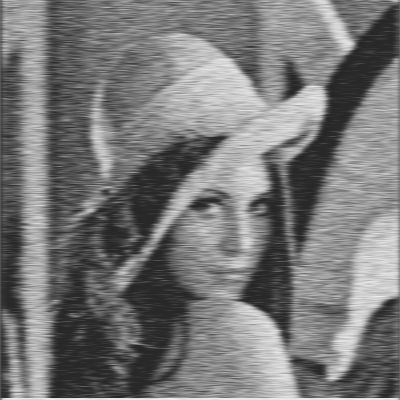

In [49]:
cv2_imshow(denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

---
---
---

# Case 2 (Blind Deconvolution Problem)
A is a matrix derived out of assuming some camera shake

## Adding Noise

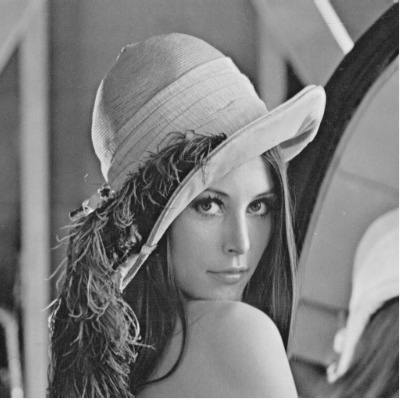

In [57]:
img = Image.open('OIP.jpg').convert('L')
img

array([[163, 163, 162, ..., 166, 131, 239],
       [162, 162, 161, ..., 161, 125, 243],
       [161, 161, 161, ..., 103,  77, 239],
       ...,
       [ 45,  46,  48, ...,  95, 109, 241],
       [249, 250, 249, ..., 246, 246, 254],
       [252, 253, 251, ..., 249, 253, 249]], dtype=uint8)
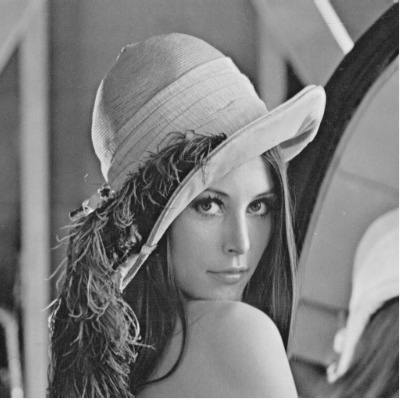

In [58]:
img_data = np.asarray(img)
img_data

In [59]:
mean = 1000
var = 2000
sigma = var ** 0.5

noise = np.random.normal(mean, sigma, img_data.shape)

In [60]:
noise

array([[1075.04230974, 1037.37814887, 1047.6948081 , ..., 1042.26715253,
        1022.9921531 ,  928.18156117],
       [1036.68085382, 1017.08732835,  974.88291352, ...,  987.59048683,
        1007.90684166,  984.56802022],
       [1037.37565878, 1000.22857911,  954.67736942, ..., 1020.67435873,
         955.59877633, 1000.21475831],
       ...,
       [ 917.90664043,  970.4776717 ,  986.03940567, ...,  924.73607787,
         973.61938559,  917.33548747],
       [1005.4035686 , 1058.81035348,  999.46149403, ...,  911.68063608,
        1033.13878863, 1019.76619971],
       [1008.92326798, 1043.76525674, 1029.08123832, ..., 1000.79893648,
         957.52976488, 1043.64238591]])

In [61]:
kernel_size = 20 # More of this, more the blur

kernel_v = np.zeros((kernel_size, kernel_size))
kernel_h = np.copy(kernel_v)

In [62]:
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)

In [63]:
# Normalize
kernel_v /= kernel_size
kernel_h /= kernel_size

In [64]:
# Vertical and Horizontal imaging

vertical_mb = cv2.filter2D(img_data, -1, kernel_v)
horizonal_mb = cv2.filter2D(img_data, -1, kernel_h)

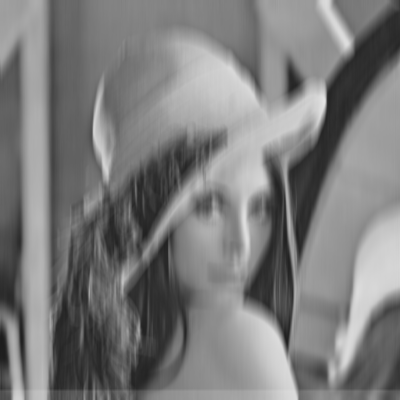

-1

In [65]:
cv2_imshow(vertical_mb)
cv2.waitKey(0)

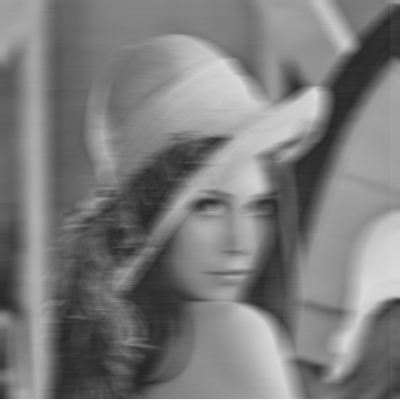

-1

In [66]:
cv2_imshow(horizonal_mb)
cv2.waitKey(0)

In [67]:
noisy_image = vertical_mb + noise

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

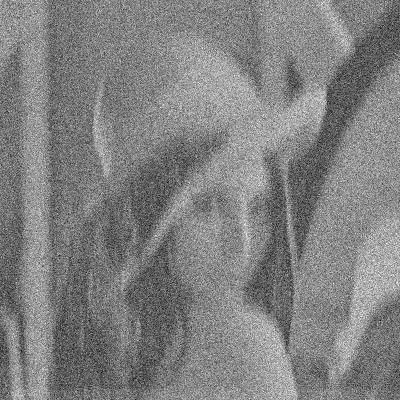

-1

In [68]:
cv2_imshow(noisy_image)
cv2.waitKey(0)

## Wiener Filter

In [69]:
# Assume that we don't have the original noise free image (f)
mean_squared_noise = np.var(noise)
mean_squared_noise

1987.6444200346255

In [70]:
print(type(noisy_image))

<class 'numpy.ndarray'>


In [71]:
mean_squared_noise = int(mean_squared_noise)

In [72]:
filtered_image = wiener(noisy_image, (5, 5), noise = mean_squared_noise)
filtered_image

array([[ 56.32,  71.92,  87.36, ...,  62.84,  48.64,  35.4 ],
       [ 73.6 ,  94.24, 115.24, ...,  86.  ,  68.52,  51.04],
       [ 92.64, 118.96, 147.28, ..., 106.64,  84.4 ,  63.2 ],
       ...,
       [ 66.  ,  86.2 , 107.32, ..., 113.72,  91.84,  68.76],
       [ 52.68,  68.32,  86.56, ...,  88.36,  71.04,  52.8 ],
       [ 38.64,  50.96,  64.2 , ...,  66.68,  52.68,  39.32]])

In [73]:
filtered_image.shape

(400, 400)

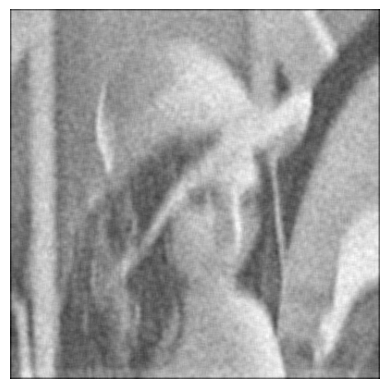

In [74]:
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

## MAP Estimation

## Deep Network Approach

In [75]:
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)

In [76]:
# Normalize the data to a range of 0 to 1
img_norm = img.astype(np.float32) / 255.0
noisy_image_norm = noisy_image.astype(np.float32) / 255.0

In [77]:
img_norm

array([[0.6392157 , 0.6392157 , 0.63529414, ..., 0.6509804 , 0.5137255 ,
        0.9529412 ],
       [0.63529414, 0.63529414, 0.6313726 , ..., 0.6313726 , 0.49019608,
        0.9764706 ],
       [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.40392157, 0.3019608 ,
        0.9490196 ],
       ...,
       [0.1764706 , 0.18039216, 0.1882353 , ..., 0.37254903, 0.42745098,
        0.95686275],
       [0.9843137 , 0.99215686, 0.9843137 , ..., 0.9764706 , 0.9647059 ,
        0.99607843],
       [0.99215686, 0.99607843, 0.9843137 , ..., 0.98039216, 1.        ,
        0.9764706 ]], dtype=float32)

In [78]:
noisy_image_norm

array([[0.72156864, 0.64705884, 0.6666667 , ..., 0.49019608, 0.44313726,
        0.24313726],
       [0.64705884, 0.60784316, 0.5254902 , ..., 0.38431373, 0.41568628,
        0.3529412 ],
       [0.64705884, 0.57254905, 0.4862745 , ..., 0.44705883, 0.3137255 ,
        0.38039216],
       ...,
       [0.2627451 , 0.35686275, 0.39215687, ..., 0.32156864, 0.41960785,
        0.32156864],
       [0.42745098, 0.5254902 , 0.41568628, ..., 0.29803923, 0.5372549 ,
        0.52156866],
       [0.43529412, 0.49803922, 0.4745098 , ..., 0.47058824, 0.39215687,
        0.57254905]], dtype=float32)

In [79]:
img_norm.shape

(400, 400)

In [80]:
noisy_image_norm.shape

(400, 400)

In [81]:
img_norm = np.expand_dims(img_norm, axis = -1)

In [82]:
noisy_image_norm = np.expand_dims(noisy_image_norm, axis = -1)

In [83]:
img_norm.shape

(400, 400, 1)

In [84]:
# Denoising Autoencoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=img_norm.shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

# Bottleneck layer (latent space representation)
model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))

# Decoder part
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


In [85]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

In [86]:
model.fit(noisy_image_norm, img_norm, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 5s 155ms/step - loss: 0.0391
Epoch 2/10
13/13 [==============================] - 2s 152ms/step - loss: 0.0381
Epoch 3/10
13/13 [==============================] - 2s 137ms/step - loss: 0.0338
Epoch 4/10
13/13 [==============================] - 2s 167ms/step - loss: 0.0257
Epoch 5/10
13/13 [==============================] - 2s 154ms/step - loss: 0.0195
Epoch 6/10
13/13 [==============================] - 1s 80ms/step - loss: 0.0156
Epoch 7/10
13/13 [==============================] - 1s 79ms/step - loss: 0.0130
Epoch 8/10
13/13 [==============================] - 1s 83ms/step - loss: 0.0117
Epoch 9/10
13/13 [==============================] - 1s 81ms/step - loss: 0.0112
Epoch 10/10
13/13 [==============================] - 1s 79ms/step - loss: 0.0109


In [87]:
denoised_image = model.predict(noisy_image_norm)

13/13 [==============================] - 0s 23ms/step


In [88]:
denoised_image.shape

(400, 400, 4, 1)

In [89]:
denoised_image = denoised_image[:, :, 1, :]

In [90]:
# denoised_image = denoised_image.reshape((denoised_image.shape[0], denoised_image.shape[1]))
denoised_image = denoised_image * 255.0
denoised_image = denoised_image.astype(np.uint8)


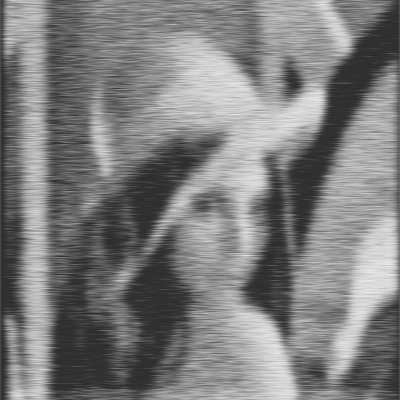

In [91]:
cv2_imshow(denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# To Do
PSNR, PSF